In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# 加载matlab的cell数据
polar_data = scipy.io.loadmat('polar.mat')

In [3]:
p_x = polar_data['p_x']
p_y = polar_data['p_y']
p_z = polar_data['p_z']
#TDA = p_x[5,5]
#TDA = np.array(TDA)
#print(TDA.shape)

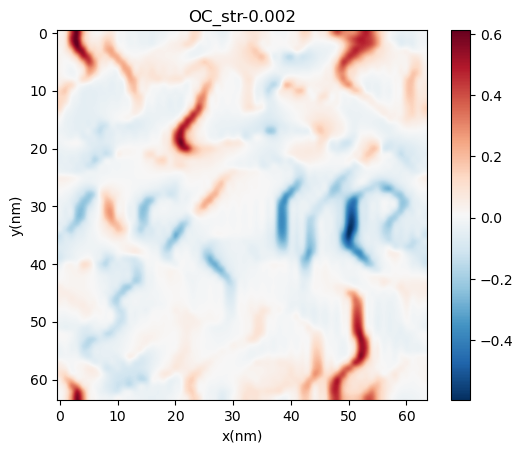

In [4]:
plt.imshow(p_y[:,:,10],cmap='RdBu_r',interpolation='spline16')
plt.colorbar()
plt.xlabel('x(nm)')
plt.ylabel('y(nm)')
plt.title('OC_str-0.002')
plt.show()
#plt.imshow(p_x[:,:,10],cmap='viridis')
#plt.colorbar()
#plt.show()

In [5]:
#极化投影图
polarplot_data = scipy.io.loadmat('polarplot.mat')

In [6]:
rho = polarplot_data['rho']
theta = polarplot_data['theta']
P = polarplot_data['P']

In [7]:
# # 内部
# r = rho[:,:,2:16]
# t = theta[:,:,2:16]
# p = P[:,:,2:16]

# # 半层
# r = rho[:,:,0:9]
# t = theta[:,:,0:9]
# p = P[:,:,0:9]

# # 表面
# r = rho[:,:,0:3]
# t = theta[:,:,0:3]
# p = P[:,:,0:3]

# 全部
r = rho
t = theta
p = P

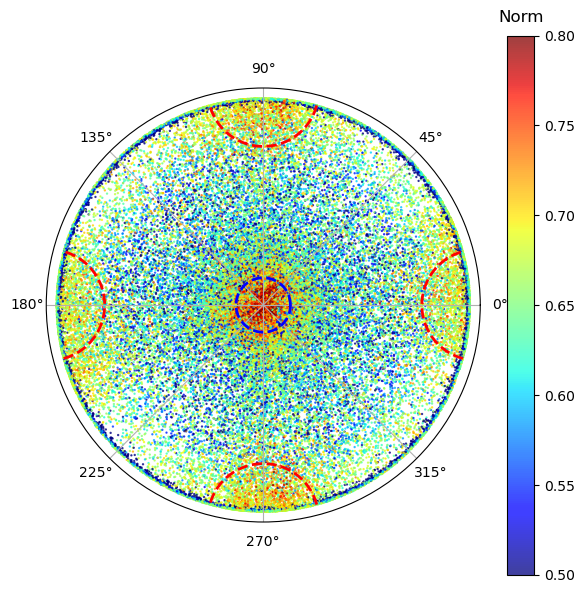

In [9]:
r = rho
t = theta
p = P
# 将三维数组展开为一维数组以用于绘图
rho_flat = r.flatten()
theta_flat = t.flatten()
p_flat = p.flatten()

# 创建极坐标图
plt.figure(figsize=(7,7))
ax = plt.subplot(111,projection='polar')
norm = mcolors.Normalize(vmin=0.5, vmax=0.8)

#统计区域
theta0 =15

t = np.linspace(0,np.pi*2,1000)
# t = np.linspace(-np.pi,np.pi,1000)
r0 = np.sin(np.deg2rad(theta0))
y0 = np.cos(np.deg2rad(theta0))
x0 = np.cos(np.deg2rad(theta0))
    
x = 2*r0*np.cos(t)/(r0*np.sin(t)+1)
y = 2*y0/(r0*np.sin(t)+1)
t = np.linspace(0, np.pi, 1000)

theta1 = np.linspace(0, np.pi, 1000)
ra1 = 2/(r0*np.sin(theta1)+1)*(y0**2+r0**2*np.cos(theta1)**2)**0.5
ra2 = 2/(r0*np.sin(theta1)+1)*(x0**2+r0**2*np.cos(theta1)**2)**0.5
ra3 = ra1
ra4 = ra2

 #角度映射
if np.any(np.isclose(theta, np.pi/2.1e-6)):
    angle1 = 0
else:
    angle1 = np.arctan(y0/(r0*np.cos(theta1)))
angle1[angle1<0]=np.arctan(y0/(r0*np.cos(theta1[theta1>np.pi/2])))+np.pi
angle2 = np.arctan((r0*np.cos(theta1)/x0))

if np.any(np.isclose(theta, np.pi/2.1e-6)):
    angle3 = 0
else:
    angle3 = np.arctan(-y0/(r0*np.cos(theta1)))
angle3[angle3>0]=np.arctan(-y0/(r0*np.cos(theta1[theta1>np.pi/2])))-np.pi
angle4 = np.arctan((r0*np.cos(theta1)/x0/(-1)))
  
  #c 畴：
th = np.linspace(0,np.pi*2,1000)
rc = 2*r0/(1+y0) 
r_c = np.full_like(th, rc)




ax.plot(angle1-np.pi/2,ra1,color="red",linestyle='--',linewidth=2)
ax.plot(angle2-np.pi/2,ra2,color="red",linestyle='--',linewidth=2)
ax.plot(angle3-np.pi/2,ra3,color="red",linestyle='--',linewidth=2)
ax.plot(angle4+np.pi/2,ra4,color="red",linestyle='--',linewidth=2)
ax.plot(th,r_c,color="b",linestyle='--',linewidth=2)


# 绘制散点图
scatter = ax.scatter(theta_flat,rho_flat,c=p_flat,cmap='jet',norm=norm,s=0.5,alpha=0.75)

ax.set_yticklabels([])
ax.yaxis.set_visible(False)  # 隐藏径向刻度线
ax.xaxis.set_visible(True)   # 保留角度刻度线

cbar=plt.colorbar(scatter,ax=ax)
# cbar.set_ticks([0.5,0.65,0.8])  
# cbar.set_ticklabels(['Low', 'Medium', 'High'])
cbar.ax.set_title("Norm",pad=10)
# plt.savefig('polar_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()
